In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import datetime

from src.poly_reg import model_county
from src.poly_reg import model_state
from src.data_import import extract_nyt
import src.data_import as di

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Base data sets
nyt_df = di.extract_nyt()
airports_df = di.extract_airports()
counties_df = di.extract_geography()

In [4]:
#Build international arrivals influence df
intl_arrivals_df = di.build_intl_arrivals_index_df(counties_df, airports_df, 100)

In [7]:
#First, get max cases, deaths
grouped = nyt_df.groupby('sc')
cases = grouped['cases'].agg([np.max])
cases.columns = ['cases']
deaths = grouped['deaths'].agg([np.max])
deaths.columns = ['deaths']


In [22]:
big_df = pd.merge(intl_arrivals_df, counties_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df = pd.merge(deaths,big_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df = pd.merge(cases,big_df, how='inner', left_on=['sc'], right_on=['sc'])

big_df['death_rate'] = big_df['deaths'] / big_df['Pop'] * 100000
big_df['case_rate'] = big_df['cases'] / big_df['Pop'] * 100000
big_df['intl_normed'] = big_df['international'] / big_df['Pop']
clean_df = big_df[[
    'sc',
    'cases',
    'deaths',
    'case_rate',
    'death_rate',
    'international',
    #'intl_normed',
    'domestic',
    'airports',
    'Pop'  
]]
clean_df

sc  cases  deaths    case_rate  death_rate  \
0                    Alabama:Autauga     12       1    21.989701    1.832475   
1                    Alabama:Baldwin     38       1    20.848764    0.548652   
2                    Alabama:Barbour      3       0    10.926175    0.000000   
3                       Alabama:Bibb      7       0    30.547676    0.000000   
4                     Alabama:Blount     10       0    17.445309    0.000000   
5                    Alabama:Bullock      3       0    27.487631    0.000000   
6                     Alabama:Butler      1       0     4.773953    0.000000   
7                    Alabama:Calhoun     38       0    32.048038    0.000000   
8                   Alabama:Chambers     96       7   280.578694   20.458863   
9                   Alabama:Cherokee      6       0    23.086691    0.000000   
10                   Alabama:Chilton     20       0    45.826364    0.000000   
11                   Alabama:Choctaw      6       0    43.293167    0.000000   
12                    Alabama:Clarke      9       0    34.839159    0.000000   
13                      Alabama:Clay      9       0    64.599483    0.000000   
14                  Alabama:Cleburne      9       0    60.112209    0.000000   
15                    Alabama:Coffee      8       0    16.016657    0.000000   
16                   Alabama:Colbert      7       1    12.861027    1.837290   
17                   Alabama:Conecuh      2       0    15.119444    0.000000   
18                     Alabama:Coosa      8       0    69.330098    0.000000   
19                 Alabama:Covington      5       0    13.239772    0.000000   
20                  Alabama:Crenshaw      2       0    14.382281    0.000000   
21                   Alabama:Cullman     20       1    24.873766    1.243688   
22                      Alabama:Dale      4       0     7.960041    0.000000   
23                    Alabama:Dallas      7       0    15.974441    0.000000   
24                    Alabama:DeKalb     14       0    19.688084    0.000000   
25                    Alabama:Elmore     20       0    25.219727    0.000000   
26                  Alabama:Escambia      3       0     7.829014    0.000000   
27                    Alabama:Etowah     42       3    40.218328    2.872738   
28                   Alabama:Fayette      1       0     5.800128    0.000000   
29                  Alabama:Franklin      7       0    22.079233    0.000000   
30                    Alabama:Greene      8       0    88.446656    0.000000   
31                      Alabama:Hale      5       0    31.725888    0.000000   
32                     Alabama:Henry      4       0    23.118715    0.000000   
33                   Alabama:Houston     24       1    23.634376    0.984766   
34                   Alabama:Jackson     17       1    31.938678    1.878746   
35                 Alabama:Jefferson    438      11    66.518241    1.670549   
36                     Alabama:Lamar      5       0    34.331228    0.000000   
37                Alabama:Lauderdale     16       2    17.258303    2.157288   
38                  Alabama:Lawrence      8       0    23.297126    0.000000   
39                       Alabama:Lee    118       3    84.137272    2.139083   
40                 Alabama:Limestone     33       0    39.863738    0.000000   
41                   Alabama:Lowndes      6       0    53.102044    0.000000   
42                     Alabama:Macon      5       1    23.307850    4.661570   
43                   Alabama:Madison    141       2    42.113312    0.597352   
44                   Alabama:Marengo     13       0    61.825272    0.000000   
45                    Alabama:Marion     19       2    61.736418    6.498570   
46                  Alabama:Marshall     34       1    36.551672    1.075049   
47                    Alabama:Mobile    148       6    35.836045    1.452813   
48                    Alabama:Monroe      5       0    21.675048    0.000000   
49                Alabama:Montgome

In [26]:
clean_df['Pop'].mean()

118058.19402985074

In [23]:
clean_df.corr()

cases    deaths  case_rate  death_rate  international  \
cases          1.000000  0.916561   0.606604    0.328590       0.557272   
deaths         0.916561  1.000000   0.544835    0.385225       0.483893   
case_rate      0.606604  0.544835   1.000000    0.636807       0.440932   
death_rate     0.328590  0.385225   0.636807    1.000000       0.215900   
international  0.557272  0.483893   0.440932    0.215900       1.000000   
domestic       0.321316  0.291582   0.241032    0.119194       0.765746   
Pop            0.521327  0.465912   0.152358    0.073218       0.334072   

               domestic       Pop  
cases          0.321316  0.521327  
deaths         0.291582  0.465912  
case_rate      0.241032  0.152358  
death_rate     0.119194  0.073218  
international  0.765746  0.334072  
domestic       1.000000  0.337519  
Pop            0.337519  1.000000

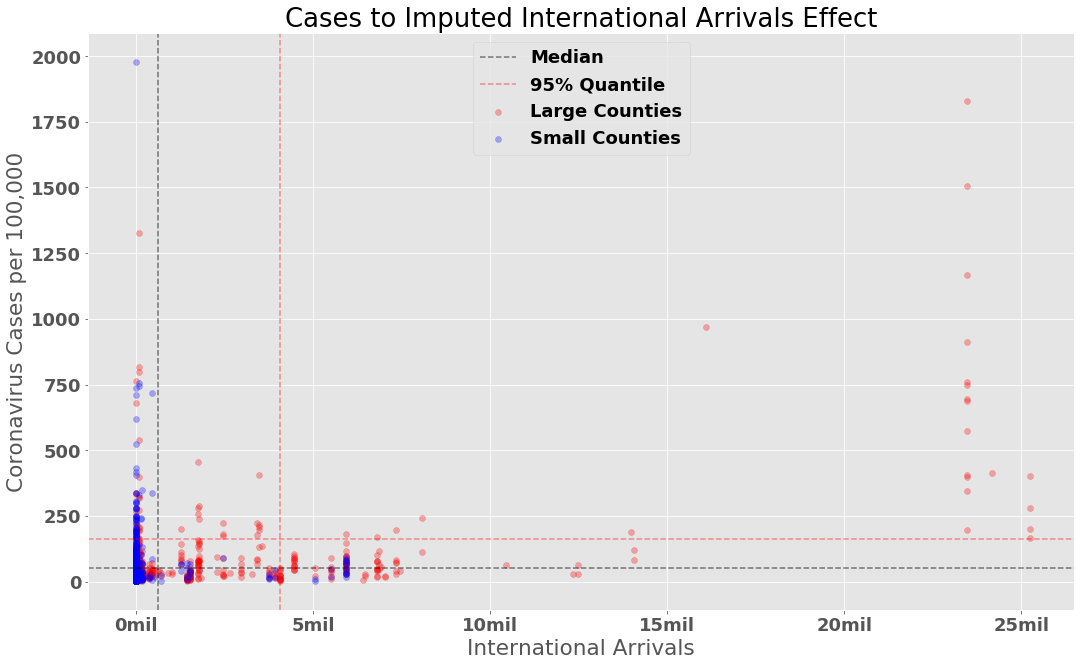

In [60]:
#International v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
pop_threshold = clean_df['Pop'].quantile(0.5)
a1 = clean_df[clean_df['Pop']>pop_threshold]
a2 = clean_df[clean_df['Pop']<pop_threshold]

plt.scatter(a1['international'], a1['case_rate'] , color = 'red', alpha=0.3, label='Large Counties') 
plt.scatter(a2['international'], a2['case_rate'] , color = 'blue', alpha=0.3, label='Small Counties') 
plt.axhline(y=clean_df['case_rate'].mean(), color='black', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=clean_df['international'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axhline(y=clean_df['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4, label='95% Quantile')
plt.axvline(x=clean_df['international'].quantile(.95), color='r', linestyle='--', alpha=0.4)
ax.set_title("Cases to Imputed International Arrivals Effect")
ax.set_xlabel("International Arrivals")
ax.set_ylabel("Coronavirus Cases per 100,000")
xlabels = ['{:,.0f}'.format(x/1e6) + 'mil' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend()

In [32]:
clean_df.sort_values(by='international', ascending=False)

sc  cases  deaths    case_rate  death_rate  \
1391             New Jersey:Somerset    902      31   278.873623    9.584348   
1383            New Jersey:Hunterdon    211       2   164.395515    1.558251   
1384               New Jersey:Mercer    740      19   201.902797    5.183991   
1385            New Jersey:Middlesex   3263      87   402.910140   10.742624   
1388                New Jersey:Ocean   2374      71   411.747464   12.314267   
1375               New Jersey:Bergen   6862     200   758.134869   22.096615   
1453                 New York:Putnam    345      12   346.003410   12.034901   
1449                 New York:Orange   3397      51   911.180672   13.679780   
1444                 New York:Nassau  15616     535  1165.780287   39.939322   
1471            New York:Westchester  14293     253  1505.932381   26.656468   
1393                New Jersey:Union   3685      78   686.860553   14.538704   
1392               New Jersey:Sussex    292      11   195.625230    7.369444   
1389              New Jersey:Passaic   3756      53   749.362563   10.574072   
1387               New Jersey:Morris   1956      60   397.338079   12.188285   
1386             New Jersey:Monmouth   2545      62   403.724737    9.835337   
1382               New Jersey:Hudson   4395      92   692.926942   14.504955   
1380                New Jersey:Essex   4493     186   573.109396   23.725428   
1455               New York:Rockland   5703      76  1829.720200   24.383436   
1463                New York:Suffolk  14473     237   969.163291   15.870359   
306               Florida:Palm Beach   1080      51    81.809877    3.863244   
265                  Florida:Broward   2075      47   118.702612    2.688686   
299               Florida:Miami-Dade   4670      41   187.066757    1.642342   
176                California:Orange    882      14    29.300067    0.465080   
167           California:Los Angeles   6360     147    64.774986    1.497158   
200               California:Ventura    226       6    27.449904    0.728759   
300                   Florida:Monroe     46       2    62.936106    2.736352   
1769              Pennsylvania:Bucks    713      20   114.034569    3.198726   
1806        Pennsylvania:Northampton    716      12   240.482308    4.030430   
156          California:Contra Costa    417       7    39.751198    0.667286   
1394               New Jersey:Warren    215       7   197.806646    6.440216   
190            California:Santa Cruz     71       1    27.059783    0.381124   
187             California:San Mateo    579      13    80.590047    1.809448   
150               California:Alameda    609      13    40.323889    0.860773   
189           California:Santa Clara   1224      40    68.700671    2.245120   
184         California:San Francisco    586       9    72.773787    1.117686   
193                California:Solano     93       1    22.499419    0.241929   
174                  California:Napa     22       2    16.119106    1.465373   
169                 California:Marin    143       9    56.654081    3.565641   
556                 Illinois:McHenry    144       3    46.638166    0.971628   
545                    Illinois:Lake    815      15   115.855583    2.132311   
2360               Wisconsin:Kenosha    104       1    62.490236    0.600868   
541                    Illinois:Kane    234      15    45.413173    2.911101   
542                Illinois:Kankakee     90       6    79.330801    5.288720   
644                   Indiana:Porter     79       0    48.070195    0.000000   
1008                Michigan:Berrien     60       2    38.262134    1.275404   
628                     Indiana:Lake    369       8    74.394411    1.612887   
527                  Illinois:DuPage    715      22    77.978109    2.399326   
533                  Illinois:Grundy      9       0    17.977349    0.000000   
521                    Illinois:Cook   8728     209   168.018211    4.023351   
525                  Illinois:DeKa

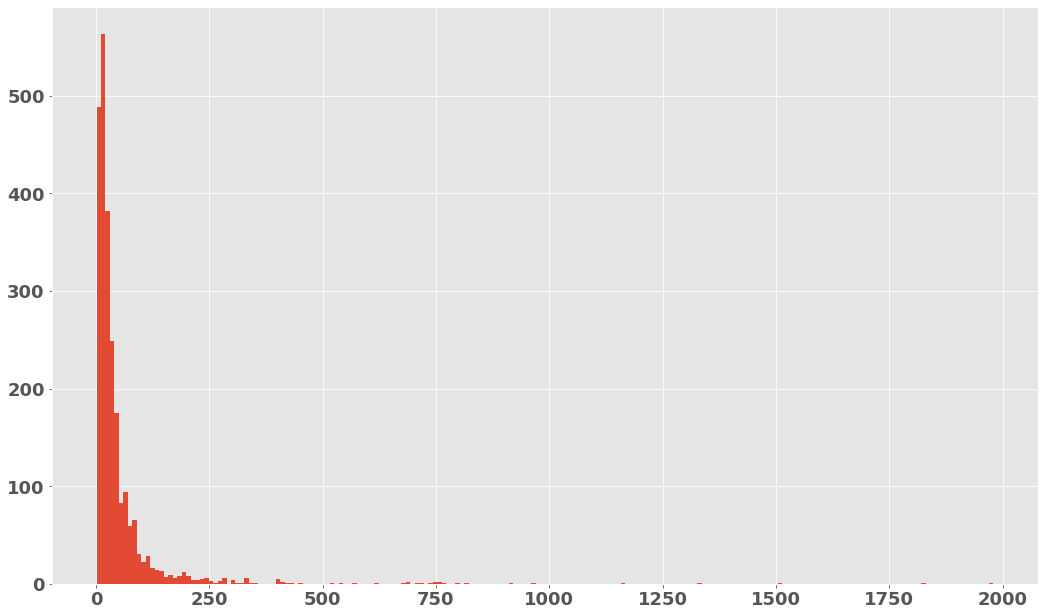

In [98]:
#Is distro of case rates normal?
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
clean_df
xxx = plt.hist(clean_df['case_rate'], bins=200)


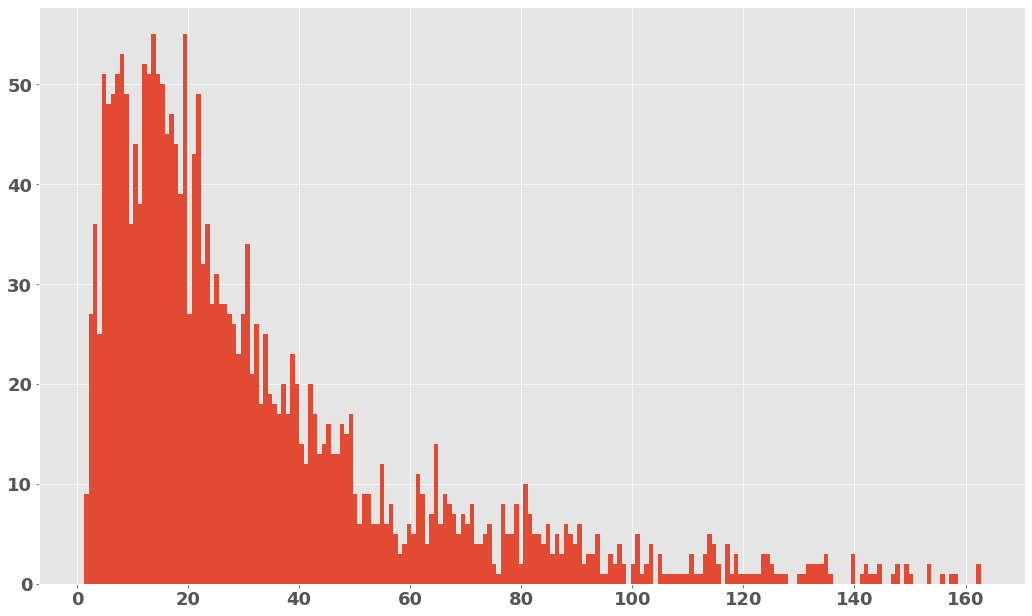

In [99]:
#What if we chop off the outliers
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
x1 = clean_df[clean_df['case_rate']< clean_df['case_rate'].quantile(.95)]
xxx = plt.hist(x1['case_rate'], bins=200)
#Still bunched up against zero

In [108]:
#H0 = counties with over 10m in int'l arrivals w/i 100km have the same Coronavirus rate as those with less than 10m
threshold = 5e6
s1 = clean_df[clean_df['international']>threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s2 = clean_df[clean_df['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
print('Sample 1 mu: {}, std: {}, count: {}'.format(s1mu, s1std, len(s1)))
print('Sample 2 mu: {}, std: {}, count: {}'.format(s2mu, s2std, len(s2)))

Sample 1 mu: 173.89485857551634, std: 303.45982412507266, count: 104
Sample 2 mu: 44.51290457676506, std: 84.96265004447052, count: 2308


In [110]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)


MannwhitneyuResult(statistic=187938.0, pvalue=7.099895087383195e-23)


In [5]:
#Build international arrivals influence df
intl_arrivals_df2 = di.build_intl_arrivals_index_df2(counties_df, airports_df, 30, 200)

In [9]:
big_df2 = pd.merge(intl_arrivals_df2, counties_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df2 = pd.merge(deaths,big_df2, how='inner', left_on=['sc'], right_on=['sc'])
big_df2 = pd.merge(cases,big_df2, how='inner', left_on=['sc'], right_on=['sc'])

big_df2['death_rate'] = big_df2['deaths'] / big_df2['Pop'] * 100000
big_df2['case_rate'] = big_df2['cases'] / big_df2['Pop'] * 100000
big_df2['intl_normed'] = big_df2['international'] / big_df2['Pop']
clean_df2 = big_df2[[
    'sc',
    'cases',
    'deaths',
    'case_rate',
    'death_rate',
    'international',
    'intl_normed',
    'domestic',
    'airports',
    'Pop'  
]]
clean_df2.sort_values(by='case_rate', ascending=False)

sc  cases  deaths    case_rate  death_rate  \
483                     Idaho:Blaine    423       2  1978.854790    9.356287   
1455               New York:Rockland   5703      76  1829.720200   24.383436   
1471            New York:Westchester  14293     253  1505.932381   26.656468   
922                Louisiana:Orleans   4565     171  1327.694872   49.734025   
1444                 New York:Nassau  15616     535  1165.780287   39.939322   
1463                New York:Suffolk  14473     237   969.163291   15.870359   
1449                 New York:Orange   3397      51   911.180672   13.679780   
913              Louisiana:Jefferson   3530     121   816.086852   27.973515   
934   Louisiana:St. John the Baptist    366      24   796.968905   52.260256   
369                Georgia:Dougherty    722      44   763.496008   46.528843   
1375               New Jersey:Bergen   6862     200   758.134869   22.096615   
933              Louisiana:St. James    167       6   755.587730   27.146865   
1389              New Jersey:Passaic   3756      53   749.362563   10.574072   
930            Louisiana:St. Bernard    267       8   743.794746   22.285985   
371                    Georgia:Early     81       5   735.828488   45.421512   
2165                     Utah:Summit    260       0   715.780200    0.000000   
452                  Georgia:Terrell     66       8   708.534622   85.882984   
1382               New Jersey:Hudson   4395      92   692.926942   14.504955   
1393                New Jersey:Union   3685      78   686.860553   14.538704   
218                   Colorado:Eagle    355       5   680.115715    9.579095   
224                Colorado:Gunnison     95       1   619.942574    6.525711   
1380                New Jersey:Essex   4493     186   573.109396   23.725428   
931            Louisiana:St. Charles    285      15   539.977264   28.419856   
407                      Georgia:Lee    148      13   523.005159   45.939642   
1073                  Michigan:Wayne   8270     346   454.249845   19.004891   
924            Louisiana:Plaquemines    100       6   433.990105   26.039406   
1693                  Oklahoma:Greer     26       3   416.733451   48.084629   
1388                New Jersey:Ocean   2374      71   411.747464   12.314267   
911              Louisiana:Iberville    136       6   407.344176   17.971067   
1000           Massachusetts:Suffolk   2929      32   405.665747    4.431992   
1386             New Jersey:Monmouth   2545      62   403.724737    9.835337   
1385            New Jersey:Middlesex   3263      87   402.910140   10.742624   
1429               New York:Dutchess   1189      12   399.679987    4.033776   
1387               New Jersey:Morris   1956      60   397.338079   12.188285   
599                  Indiana:Decatur     90       5   349.650350   19.425019   
1453                 New York:Putnam    345      12   346.003410   12.034901   
756                    Kansas:Coffey     29       1   337.170097   11.626555   
438                 Georgia:Randolph     26       2   336.831196   25.910092   
1803             Pennsylvania:Monroe    572      11   336.783599    6.476608   
2169                    Utah:Wasatch     79       0   335.741606    0.000000   
1464               New York:Sullivan    259       7   333.990999    9.026784   
892             Louisiana:Assumption     77       0   328.764784    0.000000   
891              Louisiana:Ascension    347      11   323.648743   10.259758   
916              Louisiana:Lafourche    305       7   316.659399    7.267593   
903                Louisiana:De Soto     82       4   307.623049   15.006002   
1213           Mississippi:Wilkinson     30       3   303.705203   30.370520   
1319                   Montana:Toole     16       3   300.525920   56.348610   
341                  Georgia:Calhoun     20       1   298.775022   14.938751   
1797             Pennsylvania:Lehigh   1006       8   287.842242    2.289004   
1054                Michigan:Oakla

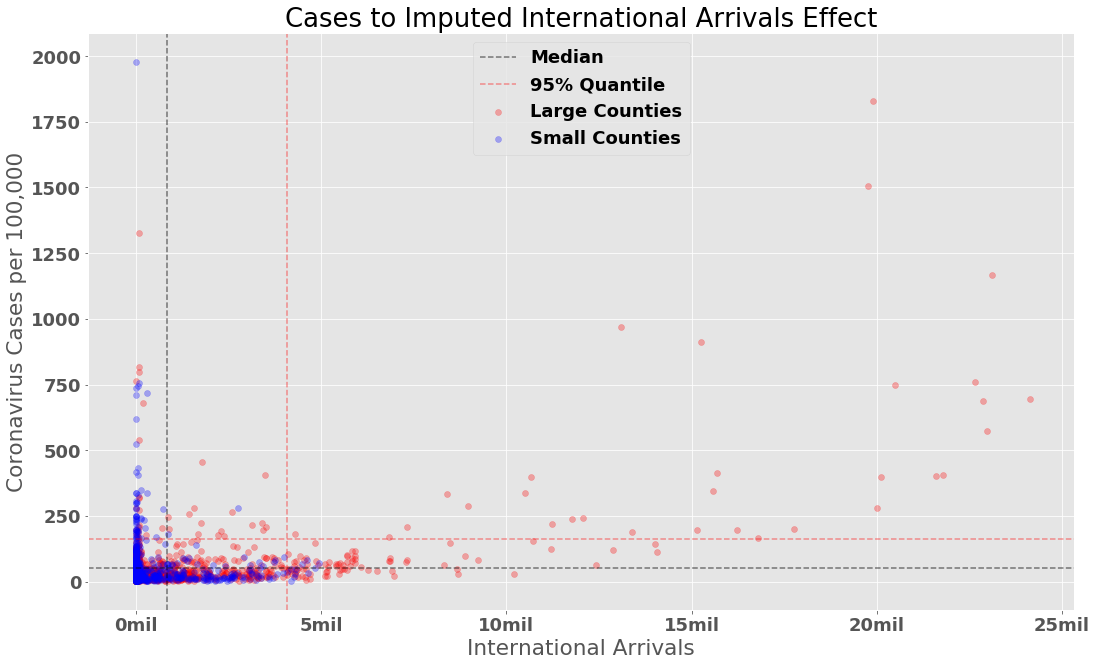

In [11]:
#International v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
pop_threshold = clean_df2['Pop'].quantile(0.5)
a1 = clean_df2[clean_df2['Pop']>pop_threshold]
a2 = clean_df2[clean_df2['Pop']<pop_threshold]

plt.scatter(a1['international'], a1['case_rate'] , color = 'red', alpha=0.3, label='Large Counties') 
plt.scatter(a2['international'], a2['case_rate'] , color = 'blue', alpha=0.3, label='Small Counties') 
plt.axhline(y=clean_df2['case_rate'].mean(), color='black', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=clean_df2['international'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axhline(y=clean_df2['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4, label='95% Quantile')
plt.axvline(x=clean_df2['international'].quantile(.95), color='r', linestyle='--', alpha=0.4)
ax.set_title("Cases to Imputed International Arrivals Effect")
ax.set_xlabel("International Arrivals")
ax.set_ylabel("Coronavirus Cases per 100,000")
xlabels = ['{:,.0f}'.format(x/1e6) + 'mil' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend()

In [12]:
clean_df2.sort_values(by='international', ascending=False)

sc  cases  deaths    case_rate  death_rate  \
1382               New Jersey:Hudson   4395      92   692.926942   14.504955   
1444                 New York:Nassau  15616     535  1165.780287   39.939322   
1380                New Jersey:Essex   4493     186   573.109396   23.725428   
1393                New Jersey:Union   3685      78   686.860553   14.538704   
1375               New Jersey:Bergen   6862     200   758.134869   22.096615   
1386             New Jersey:Monmouth   2545      62   403.724737    9.835337   
1385            New Jersey:Middlesex   3263      87   402.910140   10.742624   
1389              New Jersey:Passaic   3756      53   749.362563   10.574072   
1387               New Jersey:Morris   1956      60   397.338079   12.188285   
1391             New Jersey:Somerset    902      31   278.873623    9.584348   
1455               New York:Rockland   5703      76  1829.720200   24.383436   
1471            New York:Westchester  14293     253  1505.932381   26.656468   
1384               New Jersey:Mercer    740      19   201.902797    5.183991   
1383            New Jersey:Hunterdon    211       2   164.395515    1.558251   
1392               New Jersey:Sussex    292      11   195.625230    7.369444   
1388                New Jersey:Ocean   2374      71   411.747464   12.314267   
1453                 New York:Putnam    345      12   346.003410   12.034901   
1449                 New York:Orange   3397      51   911.180672   13.679780   
1394               New Jersey:Warren    215       7   197.806646    6.440216   
1769              Pennsylvania:Bucks    713      20   114.034569    3.198726   
1376           New Jersey:Burlington    646      11   143.960565    2.451341   
299               Florida:Miami-Dade   4670      41   187.066757    1.642342   
1463                New York:Suffolk  14473     237   969.163291   15.870359   
265                  Florida:Broward   2075      47   118.702612    2.688686   
167           California:Los Angeles   6360     147    64.774986    1.497158   
1806        Pennsylvania:Northampton    716      12   240.482308    4.030430   
1809       Pennsylvania:Philadelphia   3611      28   236.630787    1.834855   
1810               Pennsylvania:Pike    125       2   217.887709    3.486203   
1377               New Jersey:Camden    645      10   125.570176    1.946824   
1804         Pennsylvania:Montgomery   1230      22   153.774219    2.750433   
1429               New York:Dutchess   1189      12   399.679987    4.033776   
1803             Pennsylvania:Monroe    572      11   336.783599    6.476608   
176                California:Orange    882      14    29.300067    0.465080   
306               Florida:Palm Beach   1080      51    81.809877    3.863244   
1797             Pennsylvania:Lehigh   1006       8   287.842242    2.289004   
1381           New Jersey:Gloucester    279       3    96.778222    1.040626   
200               California:Ventura    226       6    27.449904    0.728759   
1374             New Jersey:Atlantic    132       1    48.078849    0.364234   
1783           Pennsylvania:Delaware    822      15   147.053825    2.683464   
1464               New York:Sullivan    259       7   333.990999    9.026784   
300                   Florida:Monroe     46       2    62.936106    2.736352   
187             California:San Mateo    579      13    80.590047    1.809448   
1467                 New York:Ulster    382       4   209.323097    2.191865   
184         California:San Francisco    586       9    72.773787    1.117686   
283                   Florida:Hendry      9       0    22.994379    0.000000   
150               California:Alameda    609      13    40.323889    0.860773   
1773             Pennsylvania:Carbon     59       1    90.422842    1.532591   
270                  Florida:Collier    249       3    77.444638    0.933068   
521                    Illinois:Cook   8728     209   168.018211    4.023351   
527                  Illinois:DuPa

Text(0.5, 52.0, 'Coronavirus Cases per 100,000')

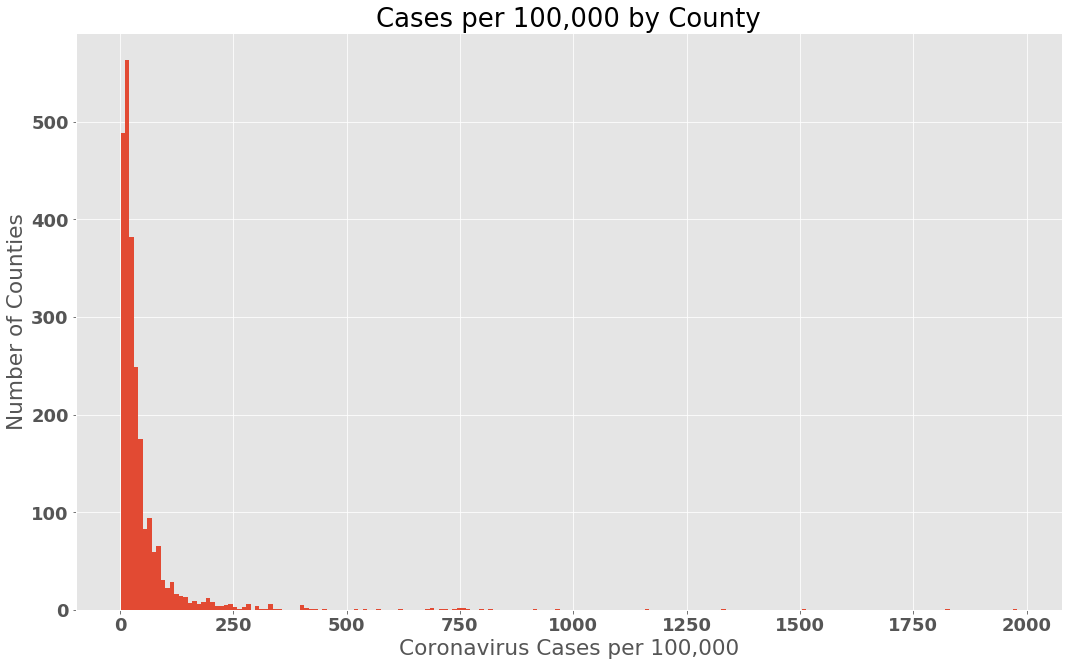

In [13]:
#Is distro of case rates normal?
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
xxx = plt.hist(clean_df2['case_rate'], bins=200)
ax.set_title("Cases per 100,000 by County")
ax.set_ylabel("Number of Counties")
ax.set_xlabel("Coronavirus Cases per 100,000")


Text(0.5, 52.0, 'Coronavirus Cases per 100,000')

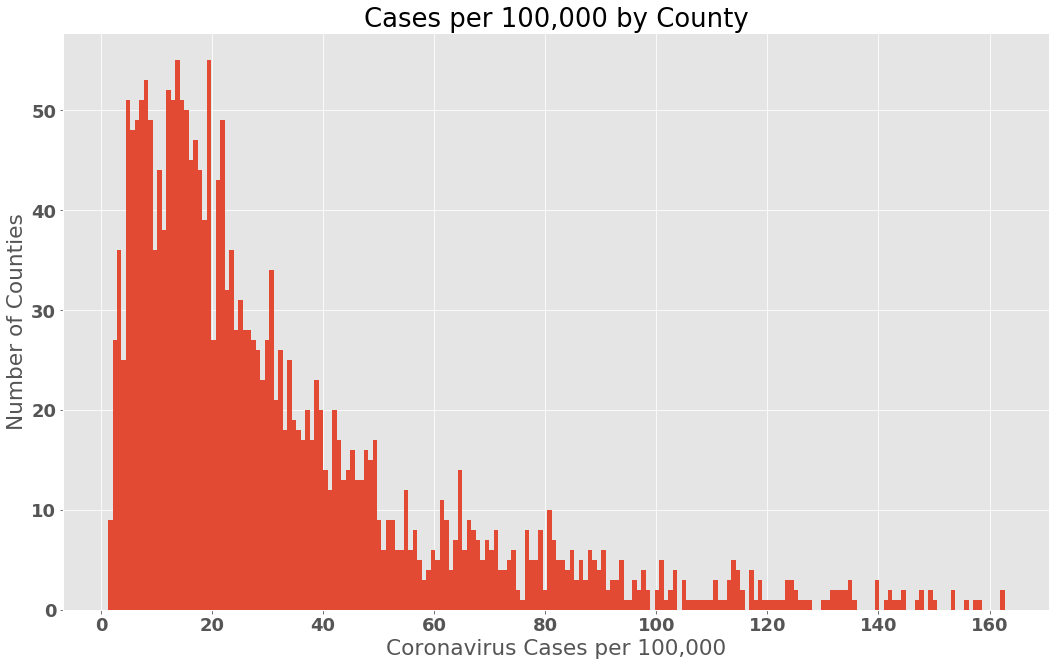

In [15]:
#Is distro of case rates normal?
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
x1 = clean_df2[clean_df2['case_rate']< clean_df2['case_rate'].quantile(.95)]
xxx = plt.hist(x1['case_rate'], bins=200)
ax.set_title("Cases per 100,000 by County")
ax.set_ylabel("Number of Counties")
ax.set_xlabel("Coronavirus Cases per 100,000")



In [32]:
#H0 = counties with over 10m in int'l arrivals w/i 100km have the same Coronavirus rate as those with less than 10m
threshold = 1e7
s1 = clean_df2[clean_df2['international']>=threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s1se = s1['case_rate'].std()/np.sqrt(len(s1))
s2 = clean_df2[clean_df2['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
s2se = s2['case_rate'].std()/np.sqrt(len(s2))
print('Sample 1 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s1mu, s1std, s1se, len(s1)))
print('Sample 2 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s2mu, s2std, s2se, len(s2)))

Sample 1 mean: 460.9, std: 422.3, se: 73.5, count: 33
Sample 2 mean: 44.4, std: 83.2, se: 1.7, count: 2,379


In [33]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)

MannwhitneyuResult(statistic=75720.0, pvalue=2.196788330886264e-20)


In [36]:
c1 = s1[['international', 'case_rate']].corr()
c2 = s2[['international', 'case_rate']].corr()
print(c1, c2)

               international  case_rate
international        1.00000    0.52597
case_rate            0.52597    1.00000                international  case_rate
international       1.000000   0.063323
case_rate           0.063323   1.000000


In [42]:
# Remove top 19 counties (all NY/NJ) then threshold = 5m
threshold = 5e6
chopped_df2 = clean_df2[clean_df2['international']<1.5e7]
s1 = chopped_df2[chopped_df2['international']>=threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s1se = s1['case_rate'].std()/np.sqrt(len(s1))
s2 = chopped_df2[chopped_df2['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
s2se = s2['case_rate'].std()/np.sqrt(len(s2))
print('Sample 1 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s1mu, s1std, s1se, len(s1)))
print('Sample 2 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s2mu, s2std, s2se, len(s2)))

Sample 1 mean: 116.8, std: 137.1, se: 17.4, count: 62
Sample 2 mean: 43.6, std: 83.4, se: 1.7, count: 2,331


In [23]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)

MannwhitneyuResult(statistic=121902.0, pvalue=1.1783592194483153e-20)


In [29]:
s1[['international', 'case_rate']].corr()

international  case_rate
international       1.000000   0.147635
case_rate           0.147635   1.000000

In [44]:
# Remove top 33 counties  then threshold = 4m
threshold = 4e6
chopped_df2 = clean_df2[clean_df2['international']<8e6]
s1 = chopped_df2[chopped_df2['international']>=threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s1se = s1['case_rate'].std()/np.sqrt(len(s1))
s2 = chopped_df2[chopped_df2['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
s2se = s2['case_rate'].std()/np.sqrt(len(s2))
print('Sample 1 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s1mu, s1std, s1se, len(s1)))
print('Sample 2 mean: {:,.1f}, std: {:,.1f}, se: {:,.1f}, count: {:,.0f}'.format(s2mu, s2std, s2se, len(s2)))

Sample 1 mean: 61.8, std: 37.0, se: 4.0, count: 84
Sample 2 mean: 43.4, std: 84.1, se: 1.8, count: 2,287


In [45]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)

MannwhitneyuResult(statistic=144616.0, pvalue=1.6306343199620373e-15)


In [46]:
chopped_df2[['international', 'case_rate']].corr()

international  case_rate
international       1.000000   0.043395
case_rate           0.043395   1.000000